<h1 style="text-align: center"> Movimento Circular Uniforme </h1>

<img src="media/mcu.png" alt="spinning chair with cellphone attached" style="width:40%; "/>

## O experimento:

Realizamos um experimento para simular um movimento circular uniforme. Algo que realiza um movimento a velocidade radial constante `w`, ao redor de um ponto fixo sempre a uma distância constante `r`.

Para simularmos esse movimento fomos ao laboratório de física experimental, lá encontramos um equipamento que viabilizou o nosso experimento: um baquinho sobre uma plataforma giratória (imagem acima).

O experimento consistiu em girar o banquinho à velocidade constante, enquanto um sensor preso a banqueta registrava as variações de aceleração. Para rotacionar a velocidade constante utilizamos marcações ao longo da circunferência, um metrônomo marcando a passagem do tempo, e uma pessoa que girava o banquinho: a cada tique do metrônomo o banquinho deveria estar em alguma marcação expecífica.

Para as marcações usamos 4 halteres, uma a cada 90 graus. Para a marcação do tempo utilizamos o metrônomo, a 60 batidas por minuto ( 60 bpm ). Com isso realizamos o experimento em duas variações:
 * 15 rotações por minuto, 15 rpm: a cada tique o celular deveria estar de frente para **o próximo haltere**, como havia 1 tique por segundo, 4 halteres, a cada 4 segundos uma rotação era completada,  $ 1min = 60 s => \dfrac{60}{4} = 15  => 15rpm$
 * 60 rpm: a cada tique o celular deveria estar de frente para **o mesmo haltere que estava anteriormente**, como havia 1 tique por segundo, havia 1 rotação por segundo, em 1 min 60 rotações => 60 rpm

<img src="media/mcu-animation.gif" alt="spinning chair with cellphone attached" style="width:60%;"/>



## Aquisição de dados

Ao realizar os experimentos contávamos com um celular para medir a aceleração, assim poderíamos medi-lá e calcular a força centrípeda resultante, utilizando também uma medição feita no banquinho: o perímetro que o celular percorria a cada volta (149,5 cm)

O celular em questão foi um samsung galaxy S7, usando o aplicativo physics toolbox. Desta forma tinhamos 3 acelerômetros, na vertical, na horizontal e de frente, cada um medindo a aceleração em intervalos inferiores a 1 milisegundo

A unidade de medida dos dados é "G force", força g, que é a quantidade de vezes que a aceleração atual é maior 10 m/s², a aceleração que o campo gravitacional da terra aplica em objetos ao nível do mar. O celular, em repouso sobre uma superfície plana, sempre indica 1 Gf (força g) em um dos eixos e 0 nos outros.

<img src="media/s7-eixos.png" alt="celular samsung s7 com três setas indicando os eixos verical, horizontal e de profundidade" style="width:35%; height:400px; float:left; margin-left:15%" >

<img src="media/physics-toolbox.jpg" alt="celular samsung s7 com três setas indicando os eixos verical, horizontal e de profundidade" style="width:20%; height:400px; margin-right:15%" >


Durante os experimentos buscamos deixar o celular "de pé", isto é, perpendicular ao chão, com a frente voltada para a parte externa da trajetória circular e com a sua parte mais alongada, o eixo Y, em direção ao teto. Desta forma seria possível observar a aceleração resultante da força centrípeda no eixo Z, e a velocidade constante poderia ser observada pelo acelerômetro do eixo X, sempre na direção do movimento.

Assim, observando o eixo Z e X poderíamos constatar a força certípeda, e a velocidade constante que deveriam haver no experimento de movimento circular uniforme.

## Expectativas

Estamos realizando dois experimentos, vamos chama-los de **15RPM** e **60RPM** indiacando a frequencia esperada em cada caso.

### 15RPM

Dado uma rotação de 15RPM, um perímetro de 1,495m, temos:

$$ 15RPM => T = \frac{60}{15} = 4s $$

$$ v = \frac {dx}{dt} = \frac{p}{T} = \frac{1.495}{4} = 0.374 $$

$$ \omega = \frac {2 \pi} {T} = \frac{2 \pi}{4} \approx 1.571 $$

$$ a = v \omega \approx 0.374 \times 1.571 \approx 0.587 $$

$$ 1Gf = 9.806 m/s² => 0.587 m/s² = \frac{0.587}{9.806} \approx 0.060 Gf $$

Assim a aceleração que esperamos que seja medida é de aproximadamente **0.060 Gf** no eixo que **z**, eixo na mesma direção da força centrípeda.

A aceleração no eixo **x** deve ser sempre zero se a velocidade é constante
 
 
### 60RPM

Dado uma rotação de 60RPM, um perímetro de 1,495m, temos:

$$ 60RPM => T = \frac{60}{60} = 1s $$

$$ v = \frac {dx}{dt} = \frac{p}{T} = \frac{1.495}{1} = 1.495 $$

$$ \omega = \frac {2 \pi} {T} = \frac{2 \pi}{1} \approx 6.28318 $$

$$ a = v \omega \approx 1.495 \times 6.28318  \approx 9.393 $$

$$ 1Gf = 9.806 m/s² => 9.393 m/s² = \frac{9.393}{9.806} \approx 0.958 Gf $$

Assim a aceleração que esperamos que seja medida é de aproximadamente **0,958 Gf** no eixo que **z**, eixo na mesma direção da força centrípeda.
 
A aceleração no eixo **x** deve ser sempre zero se a velocidade é constante

## Dados

Vamos análizar o dados coletados em cada experimento:

In [1]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
# fontes de dados
exp15rpm = []
for i in range(1,6):
    exp15rpm.append(pd.read_csv("data/brutos/mcu/15rpm-{}.csv".format(i)))

exp60rpm = []
for i in range(1,6):
    exp60rpm.append(pd.read_csv("data/brutos/mcu/60rpm-{}.csv".format(i)))

### Observando os dados de 15RPM:

Ao olhar para as primeiras linhas dos dados dos acelerômetros de um dos experimentos, é possível observar um problema. Na coluna de tempo `time` a duplicações, isto é, houve uma frequencia de coleta de dados maior que a precisão da medida de tempo, que o aplicativo physics toolbox fornece.

Nestes casos devemos deduplicar essas linhas.

In [3]:
exp15rpm[0].head()

,time,gFx,gFy,gFz,TgF
0,0.003,-0.0151,1.0049,-0.1033,1.010
1,0.004,-0.0156,1.0041,-0.0967,1.009
2,0.004,-0.0151,1.0024,-0.0911,1.007
3,0.005,-0.0147,1.0027,-0.0836,1.006
4,0.005,-0.0142,1.0019,-0.0782,1.005


In [4]:
exp15rpm[0].drop_duplicates(subset='time', inplace=True)
exp15rpm[0].head()

,time,gFx,gFy,gFz,TgF
0,0.003,-0.0151,1.0049,-0.1033,1.010
1,0.004,-0.0156,1.0041,-0.0967,1.009
3,0.005,-0.0147,1.0027,-0.0836,1.006
5,0.006,-0.0134,1.0017,-0.0689,1.004
7,0.007,-0.0134,1.0017,-0.0555,1.003


Aplicando essa deduplicação a todos os experimentos:

In [5]:
for i in range(5):
    exp15rpm[i].drop_duplicates(subset='time', inplace=True)
    exp60rpm[i].drop_duplicates(subset='time', inplace=True)

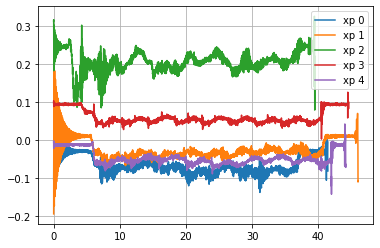

In [6]:
%matplotlib inline
for i in range(5):
    plt.plot(exp15rpm[i]["time"], exp15rpm[i]["gFz"], label="xp {}".format(i))

plt.legend()
plt.grid()
plt.show()

É possível observar o tempo de inicialização do experimento, tempo esse onde a aceleração é constante e muito próxima dos valores do celular em repouso. É possível observar também o tempo de finalização do experimento, onde novamente on valores ficam constantes e próximos aos registrados com o celular em repouso. Assim podemos afirmar que entre o tempo t0 = 10 segundos e o tempo tf = 35 segundos, com certeza o movimento circular uniforme estava acontecendo.

Vamos viuzualizar somente esses intervalo de tempo entre t0 e tf.

In [7]:
t0 = 10
tf = 35

def relevant_exp15(i):
    return exp15rpm[i][(exp15rpm[i].time > t0) & (exp15rpm[i].time < tf)]

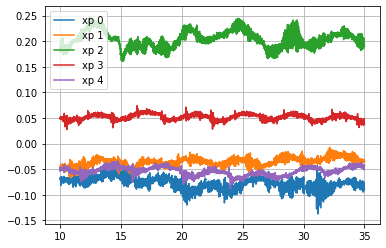

In [8]:
for i in range(5):
    plt.plot(
        relevant_exp15(i).time,
        relevant_exp15(i).gFz,
        label="xp {}".format(i)
    )

plt.legend()
plt.grid()
plt.show()

Observando os gráficos podemos observar que os experimentos `xp 2` e `xp 3` estão distoando muito do resto, vamos retirá-los

In [9]:
exp15rpm.pop(3)
exp15rpm.pop(2)
pass

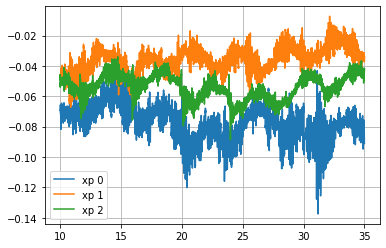

In [10]:
for i in range(len(exp15rpm)):
    plt.plot(
        relevant_exp15(i).time,
        relevant_exp15(i).gFz,
        label="xp {}".format(i)
    )

plt.legend()
plt.grid()
plt.show()

A expectativa era de observar approximadamente 0,060 Gf, vamos adicionar 0,05 de margem de error. Desta forma temos:

In [24]:
inside = 0
outside = 0

for i in range(len(exp15rpm)):
    inside_i = len(relevant_exp15(i)[(relevant_exp15(i).gFz < -0.01) & (relevant_exp15(i).gFz > -0.11)])
    inside += inside_i
    outside += len(relevant_exp15(i)) - inside_i

inside / (inside + outside)

0.9964484874918221

Assim 99,64% dos dados coletados estão nessa faixa!

### Observando os dados de 60RPM:

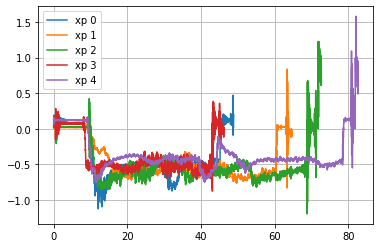

In [28]:
%matplotlib inline
for i in range(5):
    plt.plot(exp60rpm[i].time, exp60rpm[i].gFz, label="xp {}".format(i))

plt.legend()
plt.grid()
plt.show()

É possível observar o tempo de inicialização do experimento, tempo esse onde a aceleração é constante e muito próxima dos valores do celular em repouso. É possível observar também o tempo de finalização do experimento, onde novamente on valores ficam constantes e próximos aos registrados com o celular em repouso. Assim podemos afirmar que entre o tempo t0 = 20 segundos e o tempo tf = 40 segundos, com certeza o movimento circular uniforme estava acontecendo.

Vamos viuzualizar somente esses intervalo de tempo entre t0 e tf.

In [32]:
t0 = 20
tf = 40

def relevant_exp60(i):
    return exp60rpm[i][(exp60rpm[i].time > t0) & (exp60rpm[i].time < tf)]

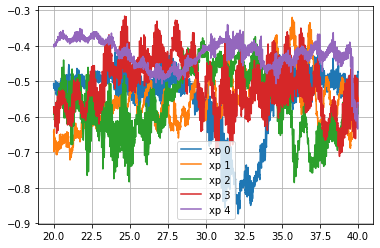

In [33]:
for i in range(5):
    plt.plot(
        relevant_exp60(i).time,
        relevant_exp60(i).gFz,
        label="xp {}".format(i)
    )

plt.legend()
plt.grid()
plt.show()

A expectativa era de observar approximadamente 0,958 Gf, vamos adicionar 0,1 de margem de error. Desta forma temos:

In [34]:
inside = 0
outside = 0

for i in range(len(exp60rpm)):
    inside_i = len(relevant_exp60(i)[(relevant_exp60(i).gFz < -0.858) & (relevant_exp60(i).gFz > -1.058)])
    inside += inside_i
    outside += len(relevant_exp60(i)) - inside_i

inside / (inside + outside)

0.0004051863857374392

Assim 99,64% dos dados coletados estão nessa faixa!